In [1]:
### Imports
%load_ext autoreload
%autoreload 2

# Append main folder
import sys
sys.path.append("../")
import math
from glob import glob

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
# import pykep as pk
import seaborn as sns
sns.set_theme()
sns.set(font_scale = 1.5)
from mpl_toolkits import mplot3d
#%matplotlib notebook

dt = 10 #timestep of the inspected simulations, affects time labels in plots
# starting_t = pk.epoch_from_string('2022-01-01 00:00:00.000') # starting t of the simulation

In [2]:
all_files = [h5py.File("/work/ga68cat/simdata/LADDS/09_oneOrbitMPI/ranks_64/cells_27/simulationData.h5_rank_"+str(i)) for i in range(64)]

In [4]:
# Load hdf5 file
data = h5py.File("/work/ga68cat/simdata/LADDS/09_oneOrbitMPI/ranks_64/cells_27/simulationData.h5_rank_0")

# Determine the iterations at which output was written
iterations_idx_str = list(data["ParticleData"].keys())
iterations_idx = []
for it in iterations_idx_str:
    if it != "ConstantProperties":
        iterations_idx.append(int(it))
iterations_idx.sort()
max_iterations = max(iterations_idx)
print("Found a total of", max_iterations, " iterations.")

# Find out the simulation runtime in days
# end_t = pk.epoch(starting_t.mjd2000 + max_iterations * dt * pk.SEC2DAY)
# total_days = end_t.mjd - starting_t.mjd
# print("Simulation ran for a total of", total_days, " days.")

Found a total of 799  iterations.


In [5]:
len(iterations_idx)

800

In [6]:
particles = {}
for rank_idx,rank in tqdm(enumerate(all_files)):
    for idx in iterations_idx:
        ids = np.array(rank["ParticleData"][str(idx)]["Particles"]["IDs"])
        for id in ids:
            if id not in particles.keys():
                particles[id] = np.zeros(len(iterations_idx))
            particles[id][idx] = rank_idx

64it [05:29,  5.16s/it]


In [7]:
rank_load = np.zeros((64,800))
for rank_idx,rank in tqdm(enumerate(all_files)):
    for idx in iterations_idx:
         rank_load[rank_idx,idx] = len(np.array(rank["ParticleData"][str(idx)]["Particles"]["IDs"]))

64it [01:41,  1.58s/it]


In [8]:
visited_ranks = []
for particle in particles.values():
    visited_ranks.append(len(np.unique(particle))) 

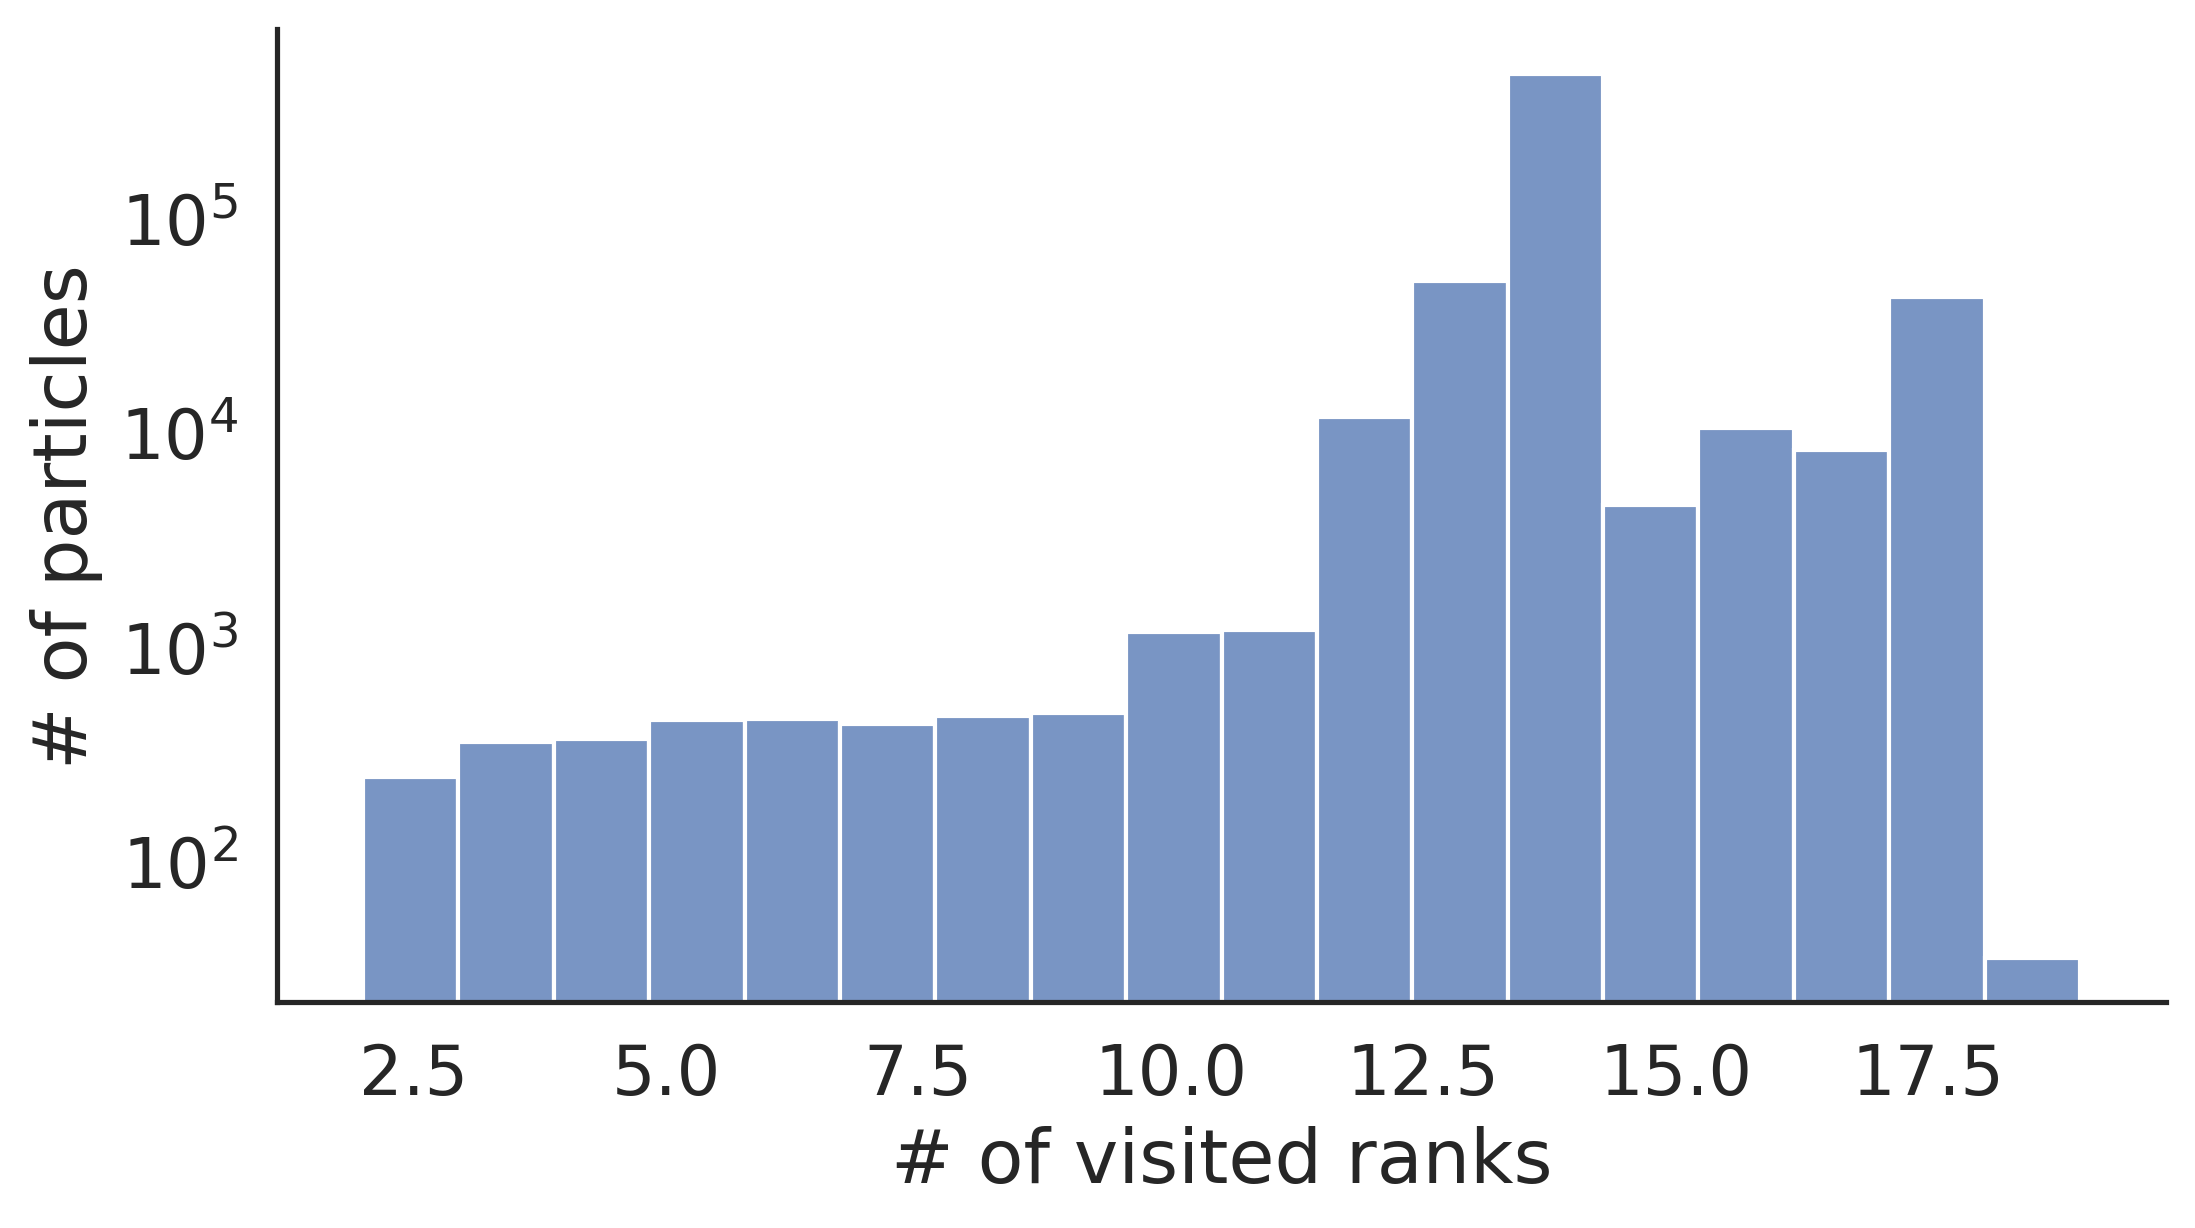

In [9]:
sns.set_style("white")
p = sns.displot(visited_ranks, kind="hist",multiple="stack",log_scale=(False,False),bins=len(np.unique(visited_ranks)))
plt.xlabel("# of visited ranks")
plt.ylabel("# of particles")
plt.yscale('log')
plt.gcf().set_size_inches(10, 4)
plt.gcf().set_dpi(300)
sns.set()

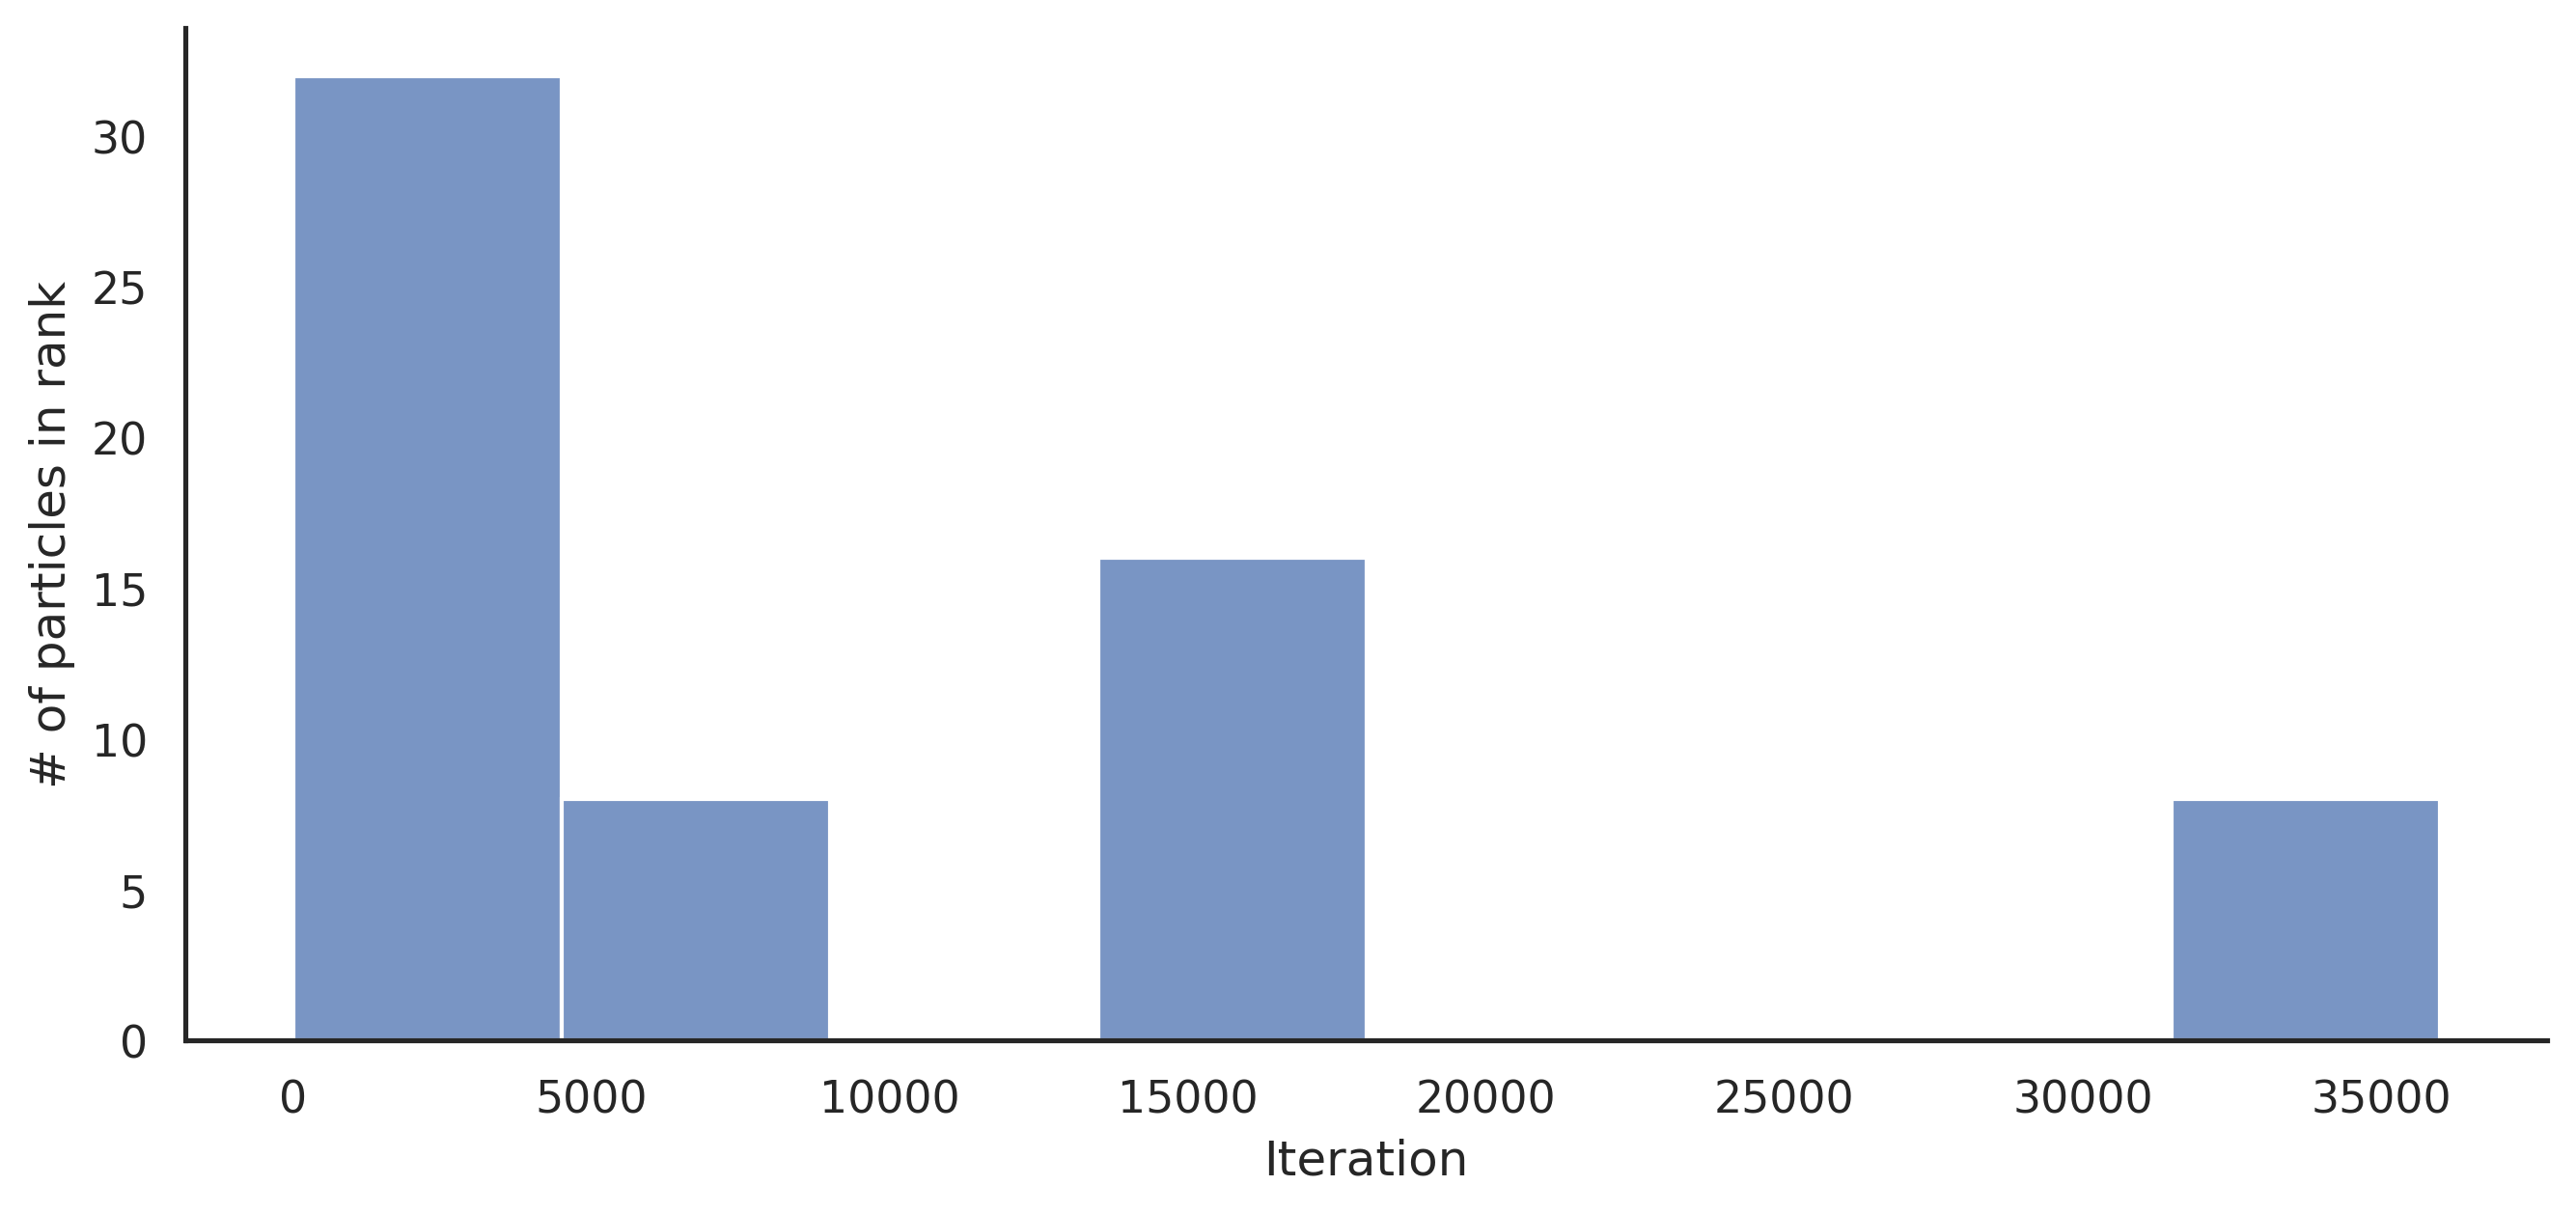

In [10]:
data = np.transpose(rank_load)
sns.set_style("white")
p = sns.displot(rank_load[:,0], kind="hist",multiple="stack",log_scale=(False,False))
plt.xlabel("Iteration")
plt.ylabel("# of particles in rank")
# plt.yscale('log')
plt.gcf().set_size_inches(10, 4)
plt.gcf().set_dpi(300)
sns.set()


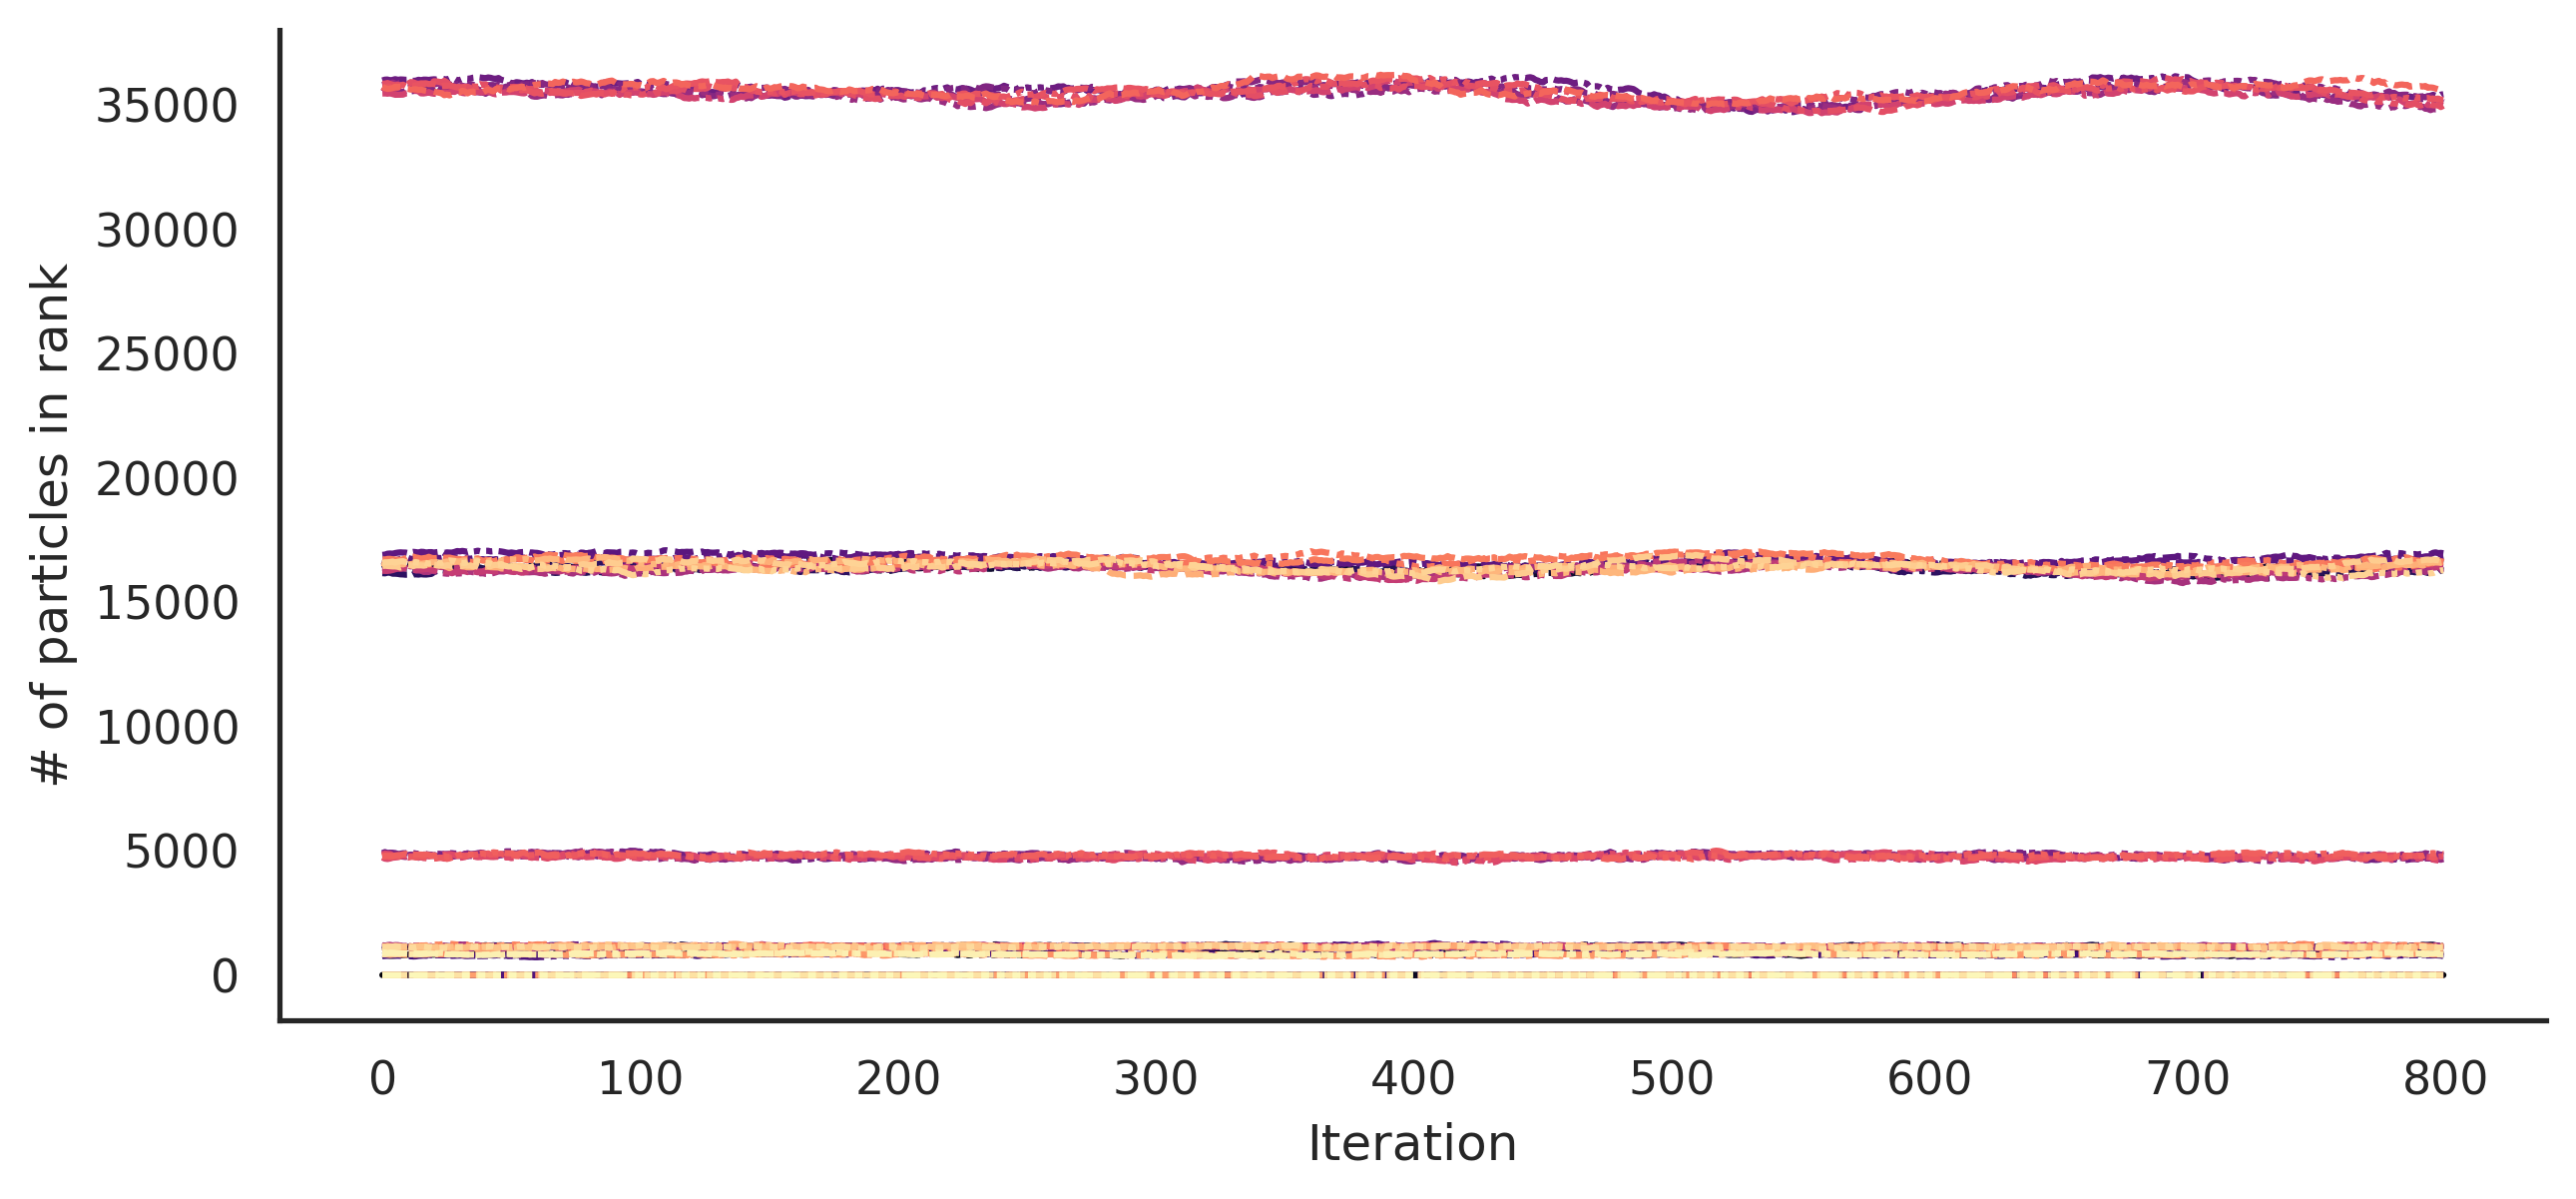

In [11]:
data = np.transpose(rank_load)
sns.set_style("white")
sns.relplot(kind="line", data=data,palette="magma",legend=False);
plt.xlabel("Iteration")
plt.ylabel("# of particles in rank")
# plt.yscale('log')
plt.gcf().set_size_inches(10, 4)
plt.gcf().set_dpi(300)
sns.set()

### Particles per rank
Error bars (=small points) for variation over time.

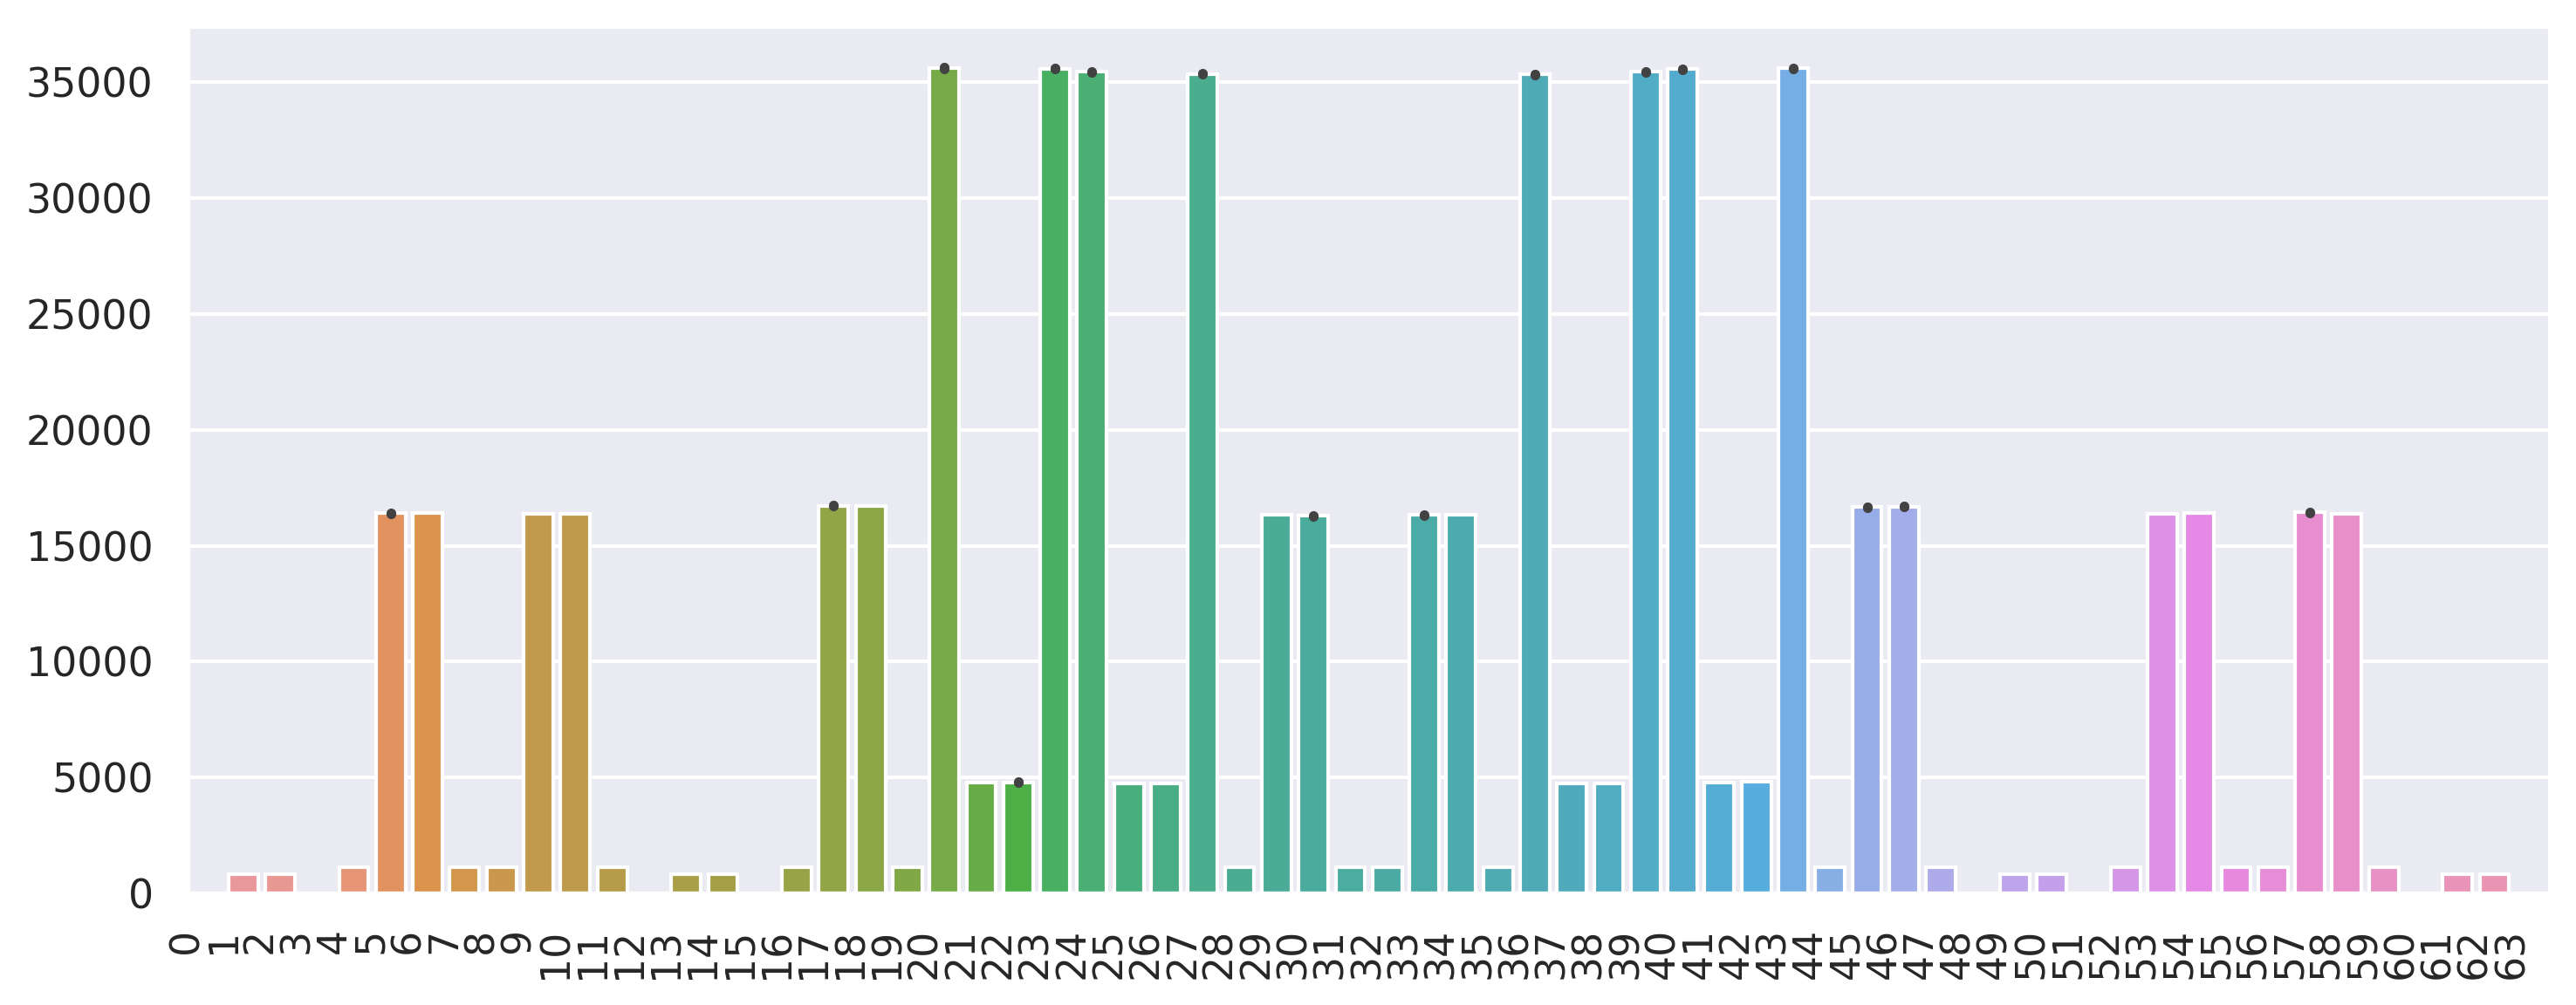

In [30]:
data = np.transpose(rank_load)
ax = sns.barplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.gcf().set_size_inches(10, 4)
plt.gcf().set_dpi(300)
plt.tight_layout()
sns.set()